## Questions to Solve:

###### 
1. What is the most frequent genre of movies release on Netflix?
2. What genre are highest voted?
3. What movie got the highest popularity? And what was its genre?
4. WWhat movie got the lowest popularity? And what was its genre?
5. Which year has the most flimmed movies?

#### Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

In [3]:
df = pd.read_csv("mymoviedb.csv", lineterminator="\n")
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### See Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


##### So by the above info we now have to do one thing that is we have to convert the dtype of Release Data column from String to DataTime Formate.

#### Checking Duplicate Movies

In [5]:
df.duplicated().sum()

np.int64(0)

#### Checking Statistics

In [6]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


##### Remove Nill Values

In [7]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

####
Now in Data Pre-processing phase we need to do:
1. Data Time formate
2. Eliminate Useless columns
3. Remove space between then the Genre (i.e action, comedy, thriller), this space between the genres need to be removed.
4. Handle outliers specially in the popularity column
5. Categorization of the Vote_average column

#### Convert dtype

In [8]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print (df["Release_Date"].dtypes)

datetime64[ns]


In [9]:
df["Release_Date"].head()

0   2021-12-15
1   2022-03-01
2   2022-02-25
3   2021-11-24
4   2021-12-22
Name: Release_Date, dtype: datetime64[ns]

In [10]:
df["Release_Date"] = df["Release_Date"].dt.year
df["Release_Date"].dtypes

dtype('int32')

In [11]:
df["Release_Date"].head()

0    2021
1    2022
2    2022
3    2021
4    2021
Name: Release_Date, dtype: int32

In [12]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


#### Now Dropping the column

In [13]:
cols = ["Overview", "Original_Language", "Poster_Url"]
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [14]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


#### Categorization of Columns

### We will make a function so that when ever we want to categorize some column we just use the function

In [15]:
def categorize_col(df, col, labels):

    edges = [df[col].describe()["min"],
             df[col].describe()["25%"],
             df[col].describe()["50%"],
             df[col].describe()["75%"],
             df[col].describe()["max"]]
    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = "drop")
    
    return df

###### Now give the column which we want to categorize

In [16]:
labels = ["not_popular", "below_average", "average", "popular"]
categorize_col(df, "Vote_Average", labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [17]:
df["Vote_Average"].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

##### Now I need to check that how many movies are popular and how many ones are not

In [18]:
df["Vote_Average"].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2412
below_average    2398
Name: count, dtype: int64

#### Removing Spaces from Genre Column

In [19]:
df["Genre"] = df["Genre"].str.split(", ")
df["Genre"].head()

0    [Action, Adventure, Science Fiction]
1              [Crime, Mystery, Thriller]
2                              [Thriller]
3    [Animation, Comedy, Family, Fantasy]
4      [Action, Adventure, Thriller, War]
Name: Genre, dtype: object

##### Giving each genre a separate row

In [20]:
df = df.explode("Genre").reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


#### Casting Genre into Category

In [21]:
df["Genre"] = df["Genre"].astype("category")
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25793 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 756.7+ KB


In [23]:
df.nunique()

Release_Date     102
Title           9513
Popularity      8160
Vote_Count      3266
Vote_Average       4
Genre             19
dtype: int64

## Data Visualization

In [24]:
sns.set_style("whitegrid")

### Q1. What is the most frequent genre of movies released on Netflix?

In [25]:
df["Genre"].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

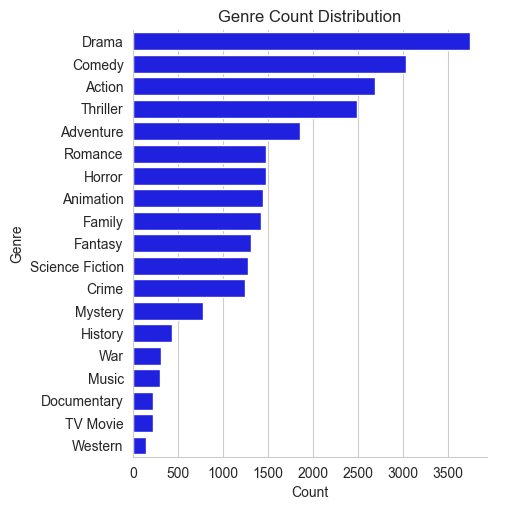

In [26]:
sns.catplot(y="Genre", kind="count", data=df, order = df["Genre"].value_counts().index, color="blue")
plt.title("Genre Count Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

### Q2. What genre are highest voted?

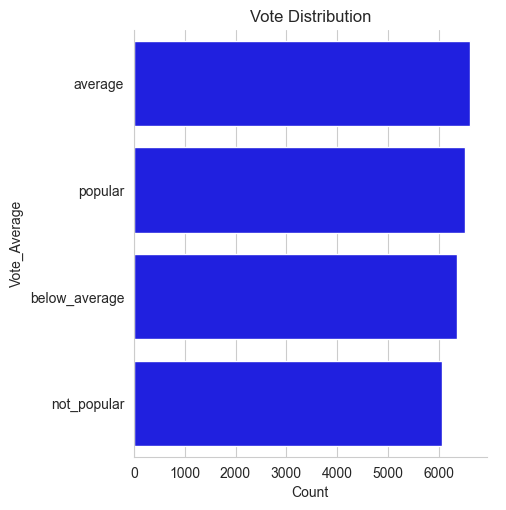

In [27]:
sns.catplot(y="Vote_Average", kind="count", data=df, order = df["Vote_Average"].value_counts().index, color="blue")
plt.title("Vote Distribution")
plt.xlabel("Count")
plt.show()

### Q3. Which movie got the highest popularity and whats its genre?

In [28]:
df [df["Popularity"] == df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### Q4. Which movie got the lowest popularity and whats its genre?

In [29]:
df [df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


### Q5. Which year has the most movies released?

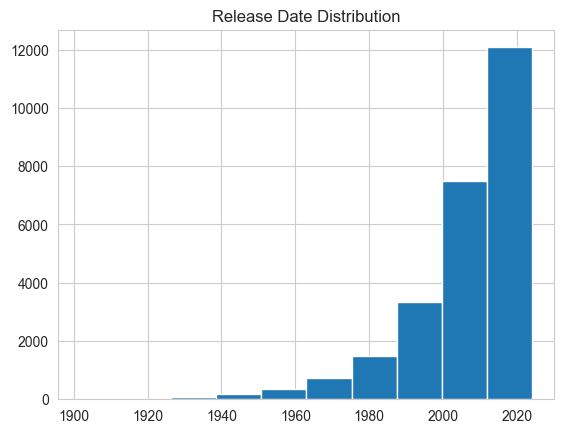

In [32]:
df["Release_Date"].hist()
plt.title("Release Date Distribution")
plt.show()

## Conclusion

#### 

Q1. What is the most frequent genre of movies release on Netflix?

    Ans. Drama genre is the most frequent genre.

Q2. What genre are highest voted?

    Ans. We have 25.5% of our dataset with popular vote. Drama genre again gets the highest popularity. 

Q3. What movie got the highest popularity? And what was its genre?

    Ans. Spider man No Way Home gets the highest popularity with the genre as "Action, Adventure and Science Fiction".

Q4. WWhat movie got the lowest popularity? And what was its genre?

    Ans. "The United States" and "Thread" got the lowest popularity.

Q5. Which year has the most filmmed movies?

    Ans. Year 2020 is the most filmmed year.